In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load combined train set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/train_set_preprocessed.npz") as npz_file:
    X_tr_np = npz_file["features"]
    y_tr = npz_file["labels"]
    print("X_tr shape:", X_tr_np.shape)
    print("y_tr shape:", y_tr.shape)
    
# load combined val set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/val_set_preprocessed.npz") as npz_file:
    X_val_np = npz_file["features"]
    y_val = npz_file["labels"]
    print("X_val shape:", X_val_np.shape)
    print("y_val shape:", y_val.shape)
    
# load combined test set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/test_set_preprocessed.npz") as npz_file:
    X_te_np = npz_file["features"]
    y_te = npz_file["labels"]
    print("X_te shape:", X_te_np.shape)
    print("y_te shape:", y_te.shape)

X_tr shape: (115027, 223)
y_tr shape: (115027,)
X_val shape: (41424, 223)
y_val shape: (41424,)
X_te shape: (41378, 223)
y_te shape: (41378,)


In [3]:
# load B term train set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/train_set_preprocessed_b.npz") as npz_file:
    X_tr_b_np = npz_file["features"]
    y_tr_b = npz_file["labels"]
    print("X_tr_b shape:", X_tr_b_np.shape)
    print("y_tr_b shape:", y_tr_b.shape)
    
# load B term val set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/val_set_preprocessed_b.npz") as npz_file:
    X_val_b_np = npz_file["features"]
    y_val_b = npz_file["labels"]
    print("X_val_b shape:", X_val_b_np.shape)
    print("y_val_b shape:", y_val_b.shape)
    
# load B term test set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/test_set_preprocessed_b.npz") as npz_file:
    X_te_b_np = npz_file["features"]
    y_te_b = npz_file["labels"]
    print("X_te_b shape:", X_te_b_np.shape)
    print("y_te_b shape:", y_te_b.shape)

X_tr_b shape: (44295, 125)
y_tr_b shape: (44295,)
X_val_b shape: (15387, 125)
y_val_b shape: (15387,)
X_te_b shape: (15871, 125)
y_te_b shape: (15871,)


In [4]:
# load J term train set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/train_set_preprocessed_j.npz") as npz_file:
    X_tr_j_np = npz_file["features"]
    y_tr_j = npz_file["labels"]
    print("X_tr_j shape:", X_tr_j_np.shape)
    print("y_tr_j shape:", y_tr_j.shape)
    
# load J term val set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/val_set_preprocessed_j.npz") as npz_file:
    X_val_j_np = npz_file["features"]
    y_val_j = npz_file["labels"]
    print("X_val_j shape:", X_val_j_np.shape)
    print("y_val_j shape:", y_val_j.shape)
    
# load J term test set
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/test_set_preprocessed_j.npz") as npz_file:
    X_te_j_np = npz_file["features"]
    y_te_j = npz_file["labels"]
    print("X_te_j shape:", X_te_j_np.shape)
    print("y_te_j shape:", y_te_j.shape)

X_tr_j shape: (62447, 137)
y_tr_j shape: (62447,)
X_val_j shape: (22864, 137)
y_val_j shape: (22864,)
X_te_j shape: (22738, 137)
y_te_j shape: (22738,)


In [5]:
# convert all matrices to sparse format to use in models
from scipy.sparse import lil_matrix

X_tr = lil_matrix(X_tr_np, dtype = np.float32).tocsr()
X_val = lil_matrix(X_val_np, dtype = np.float32).tocsr()
X_te = lil_matrix(X_te_np, dtype = np.float32).tocsr()

X_tr_b = lil_matrix(X_tr_b_np, dtype = np.float32).tocsr()
X_val_b = lil_matrix(X_val_b_np, dtype = np.float32).tocsr()
X_te_b = lil_matrix(X_te_b_np, dtype = np.float32).tocsr()

X_tr_j = lil_matrix(X_tr_j_np, dtype = np.float32).tocsr()
X_val_j = lil_matrix(X_val_j_np, dtype = np.float32).tocsr()
X_te_j = lil_matrix(X_te_j_np, dtype = np.float32).tocsr()

### k-NN Classifier
To tune the k-NN classifier, I will test `n_neighbors`, `weights: uniform vs. distance` and `p: manhattan vs. euclidean`. 

For computational reasons, I will not use the complete matrices. I tested on `n_neighbors = 3, 5, 7, 9, 11` as the only grid parameter and it took around 2.5 hours of computing time. The results were very underwhelming with 15+ percentage points overfitting at those levels while the validation accuracy was around 50%. 

To efficiently test more parameters, I will apply `TruncatedSVD` here first, reduce all data onto 31 orthogonal axes as we saw in the simple decision tree file that we can explain exactly 80% of variation with `n_components = 31`.

Following this, I will test various various `n_neighbours` possibilities, `weight = uniform / distance`, and `p = 1 / 2` for either manhattan or euclidean distance.

In [6]:
from sklearn.preprocessing import MaxAbsScaler

# separately scale all test sets before dimensionality reduction
scaler = MaxAbsScaler()

X_tr_scaled = scaler.fit_transform(X_tr)
X_val_scaled = scaler.transform(X_val)
X_te_scaled = scaler.transform(X_te)

# B term
X_tr_scaled_b = scaler.fit_transform(X_tr_b)
X_val_scaled_b = scaler.transform(X_val_b)
X_te_scaled_b = scaler.transform(X_te_b)

# J term
X_tr_scaled_j = scaler.fit_transform(X_tr_j)
X_val_scaled_j = scaler.transform(X_val_j)
X_te_scaled_j = scaler.transform(X_te_j)

In [7]:
from sklearn.decomposition import TruncatedSVD

# create object
tsvd31 = TruncatedSVD(n_components = 31, algorithm = "arpack") # naive algorithm 

# combined term
X_tr_svd = tsvd31.fit_transform(X_tr_scaled)
X_val_svd = tsvd31.transform(X_val_scaled)
X_te_svd = tsvd31.transform(X_te_scaled)

# B term
X_tr_svd_b = tsvd31.fit_transform(X_tr_scaled_b)
X_val_svd_b = tsvd31.transform(X_val_scaled_b)
X_te_svd_b = tsvd31.transform(X_te_scaled_b)

# J term
X_tr_svd_j = tsvd31.fit_transform(X_tr_scaled_j)
X_val_svd_j = tsvd31.transform(X_val_scaled_j)
X_te_svd_j = tsvd31.transform(X_te_scaled_j)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.pipeline import Pipeline

# create pipeline
knn_pipe = Pipeline([
    ("knn", KNeighborsClassifier(n_jobs = -1)) # no scaler as values are already scaled
])

# create grid
knn_grid = ParameterGrid({
    "knn__n_neighbors": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "knn__weights": ["distance", "uniform"],
    "knn__p": [1, 2]
})


# get length of grid
print("length of grid:", len(knn_grid))

length of grid: 40


In [9]:
# combined model
# loop through all combinations

# save results
knn_results = []

for params, i in zip(knn_grid, np.arange(1, 41)):
    knn_pipe.set_params(**params)
    
    # fit pipe
    knn_pipe.fit(X_tr_svd, y_tr)
    
    # calculate accuracy
    val_acc = knn_pipe.score(X_val_svd, y_val)
    train_acc = knn_pipe.score(X_tr_svd, y_tr)
    
    # append accuracy to params
    params["val_acc"] = val_acc
    params["train_acc"] = train_acc
    
    # append params to knn_results
    knn_results.append(params)
    print("finished loop {}".format(i))
    
# transform list to DataFrame
knn_results = pd.DataFrame(knn_results)
knn_results.sort_values(by = "val_acc", ascending = False)[:10]

finished loop 1
finished loop 2
finished loop 3
finished loop 4
finished loop 5
finished loop 6
finished loop 7
finished loop 8
finished loop 9
finished loop 10
finished loop 11
finished loop 12
finished loop 13
finished loop 14
finished loop 15
finished loop 16
finished loop 17
finished loop 18
finished loop 19
finished loop 20
finished loop 21
finished loop 22
finished loop 23
finished loop 24
finished loop 25
finished loop 26
finished loop 27
finished loop 28
finished loop 29
finished loop 30
finished loop 31
finished loop 32
finished loop 33
finished loop 34
finished loop 35
finished loop 36
finished loop 37
finished loop 38
finished loop 39
finished loop 40


,knn__n_neighbors,knn__p,knn__weights,train_acc,val_acc
37,100,1,uniform,0.618029,0.548136
33,90,1,uniform,0.624566,0.544515
39,100,2,uniform,0.616551,0.539760
29,80,1,uniform,0.629809,0.539735
25,70,1,uniform,0.636555,0.536404
35,90,2,uniform,0.619176,0.536283
27,70,2,uniform,0.629826,0.530852
36,100,1,distance,1.000000,0.528969
31,80,2,uniform,0.623193,0.527882
32,90,1,distance,1.000000,0.527569


It seems that `weights = distance`, where closer points are weighted more, leads to severe overfitting of train accuracy of 100%.

Furthermore, there doesn't seem to be a impactful difference among manhattan or euclidean distance measures.

As it still seems that increasing `n_neighbors` increases validation accuracy and reduces train accuracy, I will set `p = 1` and `weights = "uniform` and run another grid search only for `n_neighbors` increases.

In [10]:
# create pipeline
knn_pipe2 = Pipeline([
    ("knn", KNeighborsClassifier(p = 1, weights = "uniform",
                                 n_jobs = -1)) # no scaler as values are already scaled
])

# create grid
knn_grid2 = ParameterGrid({
    "knn__n_neighbors": [110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 300, 400, 500]
})


# get length of grid
print("length of grid:", len(knn_grid2))

length of grid: 13


In [11]:
# combined model
# loop through all combinations

# save results
knn_results2 = []

for params, i in zip(knn_grid2, np.arange(1, 14)):
    knn_pipe2.set_params(**params)
    
    # fit pipe
    knn_pipe2.fit(X_tr_svd, y_tr)
    
    # calculate accuracy
    val_acc = knn_pipe2.score(X_val_svd, y_val)
    train_acc = knn_pipe2.score(X_tr_svd, y_tr)
    
    # append accuracy to params
    params["val_acc"] = val_acc
    params["train_acc"] = train_acc
    
    # append params to knn_results
    knn_results2.append(params)
    print("finished loop {}".format(i))
    
# transform list to DataFrame
knn_results2 = pd.DataFrame(knn_results2)
knn_results2.sort_values(by = "val_acc", ascending = False)[:10]

finished loop 1
finished loop 2
finished loop 3
finished loop 4
finished loop 5
finished loop 6
finished loop 7
finished loop 8
finished loop 9
finished loop 10
finished loop 11
finished loop 12
finished loop 13


,knn__n_neighbors,train_acc,val_acc
10,300,0.593695,0.566242
7,180,0.599963,0.564576
8,190,0.598955,0.564359
9,200,0.598833,0.564335
12,500,0.589470,0.563538
11,400,0.590331,0.563345
6,170,0.601181,0.562645
5,160,0.602276,0.562379
4,150,0.602806,0.557334
1,120,0.609961,0.557261


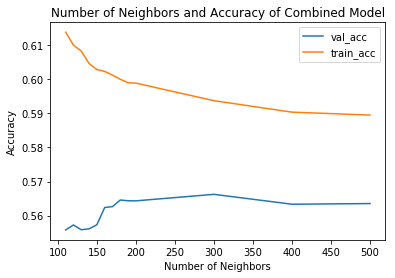

In [12]:
# visualize results
plt.plot(knn_results2["knn__n_neighbors"], knn_results2["val_acc"], label = "val_acc")
plt.plot(knn_results2["knn__n_neighbors"], knn_results2["train_acc"], label = "train_acc")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("Number of Neighbors and Accuracy of Combined Model")
plt.legend()
plt.show()

We can see here that validation accuracy seems to be capped at 56.6%. However, for `n_neighbors = 500`, train accuracy seems to drop even further, which means that overfitting still shrinks. Therefore, I will increase `n_neighbors` once again to see the effects on train and validation accuracy.

In [13]:
# create pipeline
knn_pipe3 = Pipeline([
    ("knn", KNeighborsClassifier(p = 1, weights = "uniform",
                                 n_jobs = -1)) # no scaler as values are already scaled
])

# create grid
knn_grid3 = ParameterGrid({
    "knn__n_neighbors": [600, 700, 800, 900, 1000, 1500, 2000]
})


# get length of grid
print("length of grid:", len(knn_grid3))

length of grid: 7


In [14]:
# combined model
# loop through all combinations

# save results
knn_results3 = []

for params, i in zip(knn_grid3, np.arange(1, 8)):
    knn_pipe3.set_params(**params)
    
    # fit pipe
    knn_pipe3.fit(X_tr_svd, y_tr)
    
    # calculate accuracy
    val_acc = knn_pipe3.score(X_val_svd, y_val)
    train_acc = knn_pipe3.score(X_tr_svd, y_tr)
    
    # append accuracy to params
    params["val_acc"] = val_acc
    params["train_acc"] = train_acc
    
    # append params to knn_results
    knn_results3.append(params)
    print("finished loop {}".format(i))
    
# transform list to DataFrame
knn_results3 = pd.DataFrame(knn_results3)
knn_results3.sort_values(by = "val_acc", ascending = False)[:10]

finished loop 1
finished loop 2
finished loop 3
finished loop 4
finished loop 5
finished loop 6
finished loop 7


,knn__n_neighbors,train_acc,val_acc
2,800,0.586358,0.565083
0,600,0.588479,0.564769
3,900,0.585680,0.564745
1,700,0.587427,0.564624
4,1000,0.585271,0.564238
5,1500,0.584941,0.563272
6,2000,0.584680,0.562572


In [15]:
knn_results_ = knn_results.copy()
knn_results_ = knn_results_.loc[(knn_results_["knn__p"] == 1) &
                               (knn_results_["knn__weights"] == "uniform"), :]
knn_results_ = knn_results_[["knn__n_neighbors", "train_acc", "val_acc"]]

# append two other dfs to have all values in one df
knn_results_app = knn_results_.append([knn_results2, knn_results3], ignore_index = True)

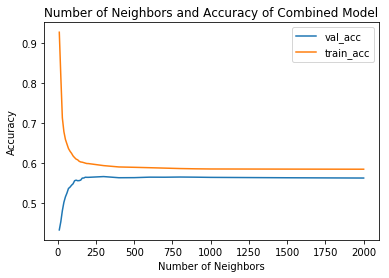

In [16]:
# visualize results
plt.plot(knn_results_app["knn__n_neighbors"], knn_results_app["val_acc"], label = "val_acc")
plt.plot(knn_results_app["knn__n_neighbors"], knn_results_app["train_acc"], label = "train_acc")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("Number of Neighbors and Accuracy of Combined Model")
plt.legend()
plt.show()

In [17]:
knn_results_app.sort_values(by = "val_acc", ascending = False)[:5]

,knn__n_neighbors,train_acc,val_acc
20,300,0.593695,0.566242
25,800,0.586358,0.565083
23,600,0.588479,0.564769
26,900,0.585680,0.564745
24,700,0.587427,0.564624


We can see here very clearly the effect of increasing `n_neighbors`. In the beginning, the models overfits very strongly because every vote of the algorithm is affected by almost every neighbor. Later on, the model gets more robust, hence the overfitting drops strongly and generalization improves on unseen data. 

In later stages of `n_neighbors > 800`, the model becomes too robust and indifferent to neighboring data, i.e. regularization gets so strong that the model suffers overall. Validation accuracy then drops off quicker than overfitting shrinks. Around `n_neighbors = 800` seems to be the optimal number of neighbors when considering overfitting and overall performance.

Going forward regarding grid search in B- and J-term, I will use the same `weights = "uniform"` and `p = 1` parameters and onyl iterate through various `n_neighbors` values.

In [18]:
# B term

# create pipeline
knn_pipe_bj = Pipeline([
    ("knn", KNeighborsClassifier(p = 1, weights = "uniform",
                                 n_jobs = -1)) # no scaler as values are already scaled
])

# create grid
knn_grid_bj = ParameterGrid({
    "knn__n_neighbors": [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
})


# get length of grid
print("length of grid:", len(knn_grid_bj))

length of grid: 11


In [19]:
# loop through all combinations

# save results
knn_results_b = []

for params, i in zip(knn_grid_bj, np.arange(1, 12)):
    knn_pipe_bj.set_params(**params)
    
    # fit pipe
    knn_pipe_bj.fit(X_tr_svd_b, y_tr_b)
    
    # calculate accuracy
    val_acc = knn_pipe_bj.score(X_val_svd_b, y_val_b)
    train_acc = knn_pipe_bj.score(X_tr_svd_b, y_tr_b)
    
    # append accuracy to param_max_depth
    params["val_acc"] = val_acc
    params["train_acc"] = train_acc
    
    # append param_max_depth to dt_results
    knn_results_b.append(params)
    print("finished loop {}".format(i))
    
# transform list to DataFrame
knn_results_b = pd.DataFrame(knn_results_b)
knn_results_b.sort_values(by = "val_acc", ascending = False)

finished loop 1
finished loop 2
finished loop 3
finished loop 4
finished loop 5
finished loop 6
finished loop 7
finished loop 8
finished loop 9
finished loop 10
finished loop 11


,knn__n_neighbors,train_acc,val_acc
6,600,0.578824,0.578540
7,700,0.578192,0.577760
8,800,0.578056,0.577630
9,900,0.577740,0.577435
10,1000,0.577695,0.577371
5,500,0.579749,0.577241
4,400,0.581736,0.576331
3,300,0.583678,0.571716
2,200,0.588441,0.570872
1,100,0.603702,0.536037


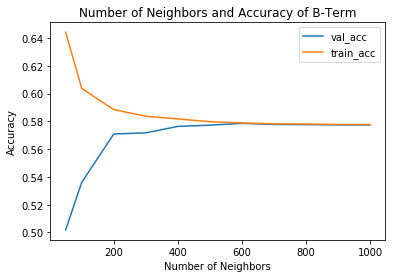

In [20]:
# visualize results
plt.plot(knn_results_b["knn__n_neighbors"], knn_results_b["val_acc"], label = "val_acc")
plt.plot(knn_results_b["knn__n_neighbors"], knn_results_b["train_acc"], label = "train_acc")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("Number of Neighbors and Accuracy of B-Term")
plt.legend()
plt.show()

As already observed in other models, the B-term overfits the least. Here we reach a validation accuracy of 57.85% and a train accuracy of 57.88% at `n_neighbors = 600`. Increasing the number of neighbors after that only reduces the overall level of accuracy. For instance, `n_neighbors = 1000` provides a validation accuracy of 57.77% and a train accuracy of 57.77%, i.e. both values go hand in hand on a continuously lower level.

In [21]:
# J term
# loop through all combinations

# save results
knn_results_j = []

for params, i in zip(knn_grid_bj, np.arange(1, 12)):
    knn_pipe_bj.set_params(**params)
    
    # fit pipe
    knn_pipe_bj.fit(X_tr_svd_j, y_tr_j)
    
    # calculate accuracy
    val_acc = knn_pipe_bj.score(X_val_svd_j, y_val_j)
    train_acc = knn_pipe_bj.score(X_tr_svd_j, y_tr_j)
    
    # append accuracy to param_max_depth
    params["val_acc"] = val_acc
    params["train_acc"] = train_acc
    
    # append param_max_depth to dt_results
    knn_results_j.append(params)
    print("finished loop {}".format(i))
    
# transform list to DataFrame
knn_results_j = pd.DataFrame(knn_results_j)
knn_results_j.sort_values(by = "val_acc", ascending = False)

finished loop 1
finished loop 2
finished loop 3
finished loop 4
finished loop 5
finished loop 6
finished loop 7
finished loop 8
finished loop 9
finished loop 10
finished loop 11


,knn__n_neighbors,train_acc,val_acc
3,300,0.626131,0.605362
4,400,0.625763,0.605012
2,200,0.629830,0.604881
5,500,0.625603,0.604619
6,600,0.625651,0.603788
8,800,0.625426,0.603569
9,900,0.625410,0.603569
10,1000,0.625394,0.603569
7,700,0.625426,0.603525
1,100,0.645459,0.590798


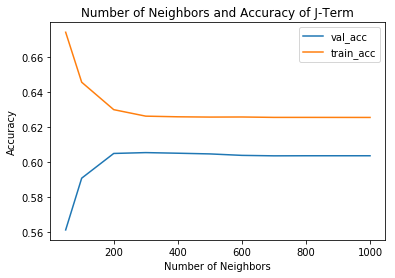

In [22]:
# visualize results
plt.plot(knn_results_j["knn__n_neighbors"], knn_results_j["val_acc"], label = "val_acc")
plt.plot(knn_results_j["knn__n_neighbors"], knn_results_j["train_acc"], label = "train_acc")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("Number of Neighbors and Accuracy of J-Term")
plt.legend()
plt.show()

In the J-term, we see a development rather similar to the combined model, which means that there is a more recognizable overfitting of around 2 percentage points here. The best performance is around `n_neighbors = 300`, which delivers a valuation accuracy of 60.5% and a train accuracy of 62.6%.

As with both other models, after the peak of 300 neighbors the model slowly starts to be too robust and valuation accuracy starts to drop.

In [23]:
# evaluate on test set

# combined set, no need for pipeline as values are already scaled
knn = KNeighborsClassifier(n_neighbors = 800, weights = "uniform", p = 1, n_jobs = -1)

# fit on train set
knn.fit(X_tr_svd, y_tr)

# get accuracy on test set
knn_acc = knn.score(X_te_svd, y_te)
print("test accuracy of combined model = {:.4f}".format(knn_acc))


# B term
knn_b = KNeighborsClassifier(n_neighbors = 600, weights = "uniform", p = 1, n_jobs = -1)

# fit on train set
knn_b.fit(X_tr_svd_b, y_tr_b)

# get accuracy on test set
knn_acc_b = knn_b.score(X_te_svd_b, y_te_b)
print("test accuracy of B term = {:.4f}".format(knn_acc_b))

# J term
knn_j = KNeighborsClassifier(n_neighbors = 300, weights = "uniform", p = 1, n_jobs = -1)

# fit on train data
knn_j.fit(X_tr_svd_j, y_tr_j)

# get accuracy on test data
knn_acc_j = knn_j.score(X_te_svd_j, y_te_j)
print("test accuracy of J term = {:.4f}".format(knn_acc_j))

test accuracy of combined model = 0.5829
test accuracy of B term = 0.5879
test accuracy of J term = 0.5834


Our final k-NN results are:
* Combined set:
    * train: 58.64%, val: 56.51%, test: 58.29%
* B term:
    * train: 57.88%, val: 57.85%, test: 58.79%
* J term:
    * train: 62.61%, val: 60.53%, test: 58.34%
    
We can see that the combined and B-term models generalize well. The combined set barely overfits (0.4 percentage points), and the B term model generalizes better with about 1 percentage point accuracy. The J-term set overfits the strongest here with about a 4 percentage point gap.

In general, it is noteworthy that all of the sets just make the cut and barely meet the most-frequent baseline. Furthermore, we have used dimensionality-reduced input matrices, which perform generally worse - as seen in simple decision tree models. However, here we reduced the space onto `n = 31` orthogonal axes which explain exactly 80% of total variance (in comparison to the 50% decision tree example where we reduced the data onto `n = 10` orthogonal axes). When we combine the test scores, we can see that we received almost exactly the same results:
* Combined: decision tree = 58.21% vs. k-nn = 58.29% 
* B-Term: decision tree = 58.89% vs. k-nn = 58.79%
* J-Term: decision tree = 58.18% vs. k-nn = 58.34%

All in all, it seems like k-NN also struggles to find the necessary patterns to classify at the level of logistic regression.

In the following, I will explore and evaluate the model results more deeply.

In [24]:
from sklearn.metrics import confusion_matrix

# get predictions in array
knn_preds = knn.predict(X_te_svd)

# create confusion matrix
knn_matrix = confusion_matrix(y_true = y_te, y_pred = knn_preds)

# convert matrix to DataFrame
knn_matrix_df = pd.DataFrame(data = knn_matrix, columns = ["pred: Fail", "pred: Withdrawn",
                                                                "pred: Pass", "pred: Distinction"],
                               index = ["true: Fail", "true: Withdrawn", "true: Pass", "true: Distinction"])
knn_matrix_df

,pred: Fail,pred: Withdrawn,pred: Pass,pred: Distinction
true: Fail,0,0,5798,51
true: Withdrawn,2,6,6428,45
true: Pass,0,0,23985,140
true: Distinction,0,0,4794,129


In [25]:
from sklearn.metrics import classification_report

# print classification report to see recall and precision scores
knn_report = classification_report(y_true = y_te, y_pred = knn_preds)
print(knn_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5849
           1       1.00      0.00      0.00      6481
           2       0.58      0.99      0.74     24125
           3       0.35      0.03      0.05      4923

   micro avg       0.58      0.58      0.58     41378
   macro avg       0.48      0.26      0.20     41378
weighted avg       0.54      0.58      0.44     41378



From the confusion matrix we can observe very clearly that the model predicts `Pass` for basically any data input possible. In doing so, we get get on one hand a recall score of 99% for class `Pass` because the model does always predict `Pass`. On the other hand, the precision score of 58% for class `Pass` shows us that while we always predict `Pass`, we are only correct in 58% of cases, which also amounts the the accuracy of our model and at the same time to the naive most-frequent baseline.

In essence, excluding the ~350 `Distinction` predictions out of ~41,000 predictions, our model does exactly the same as our most-frequent baseline. It is so biased that it sees a `Pass` outcome in every observation input. 

While there is a precision score of 100% for class `0`, meaning that every time we predicted `Withdrawn` it was indeed class `1`, the recall score of 0% clarifies that so few predictions in that class were made that the ratio is still 0%. 

We made two predictions for class `Fail`, and both of those predictions were false (false positives). This resulted in both a precision and recall score of 0%. 

#### Main problem of the model
The recall scores of 0%, 0%, and 3% for the classes except `Pass` show that our model has an extremely high false negativity rate. This may not be as impactful for the `Distinction` class, but it is for recognizing `Withdrawn` and especially for `Fail`. Predicting to finish with `Pass` when actually finishing with `Distinction` is not a problem, but predicting `Pass` when in reality the student is failing is very troublesome.

The ROC-curve will again visualize the problem of the classification between `Pass` and `Fail` in a simplified binary setting.

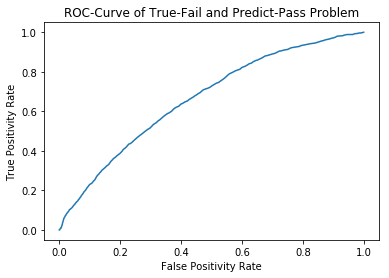

In [26]:
from sklearn.metrics import roc_curve

# get all probabilities into one variable
knn_probs = knn.predict_proba(X_te_svd)

# roc_curve returns three arrays, false positivity rate, true positivity rate (recall) and thresholds
fpr, tpr, thresholds = roc_curve(y_true = y_te, y_score = knn_probs[:, 0], # positive class = Fail / 0
                                pos_label = 0) 

# create DataFrame out of the three arrays
roc_df = pd.DataFrame({
    "fpr": fpr,
    "tpr": tpr,
    "thresholds": thresholds
})

# plot ROC curve 
plt.plot(fpr, tpr)
plt.xlabel("False Positivity Rate")
plt.ylabel("True Positivity Rate")
plt.title("ROC-Curve of True-Fail and Predict-Pass Problem")
plt.show()

We can observe here visually that the curve is much flatter than e.g. in the logistic regression model. This shows that the TPR, or recall, is even lower here and only rises when the false positivity rate also increases. 

A good model with a high recall would have a curve towards the top left corner, which would result from having a high TPR with a low FPR at the same time. 

Let's see to what level we had to lower our threshold to receive at least 85% recall.

In [27]:
roc_df[200:210]

,fpr,tpr,thresholds
200,0.600129,0.822021,0.12750
201,0.608545,0.826637,0.12625
202,0.615582,0.832108,0.12500
203,0.623800,0.840486,0.12375
204,0.631034,0.843734,0.12250
205,0.637930,0.851428,0.12125
206,0.645951,0.857070,0.12000
207,0.652509,0.859976,0.11875
208,0.659630,0.865789,0.11750
209,0.664922,0.869208,0.11625


As an example, we would have to lower our probability threshold to around 12% to get 85% recall for the `Fail` class. 

It is important to keep in mind that this is just a theoretical example that simplisticly created a binary problem out of a multi-class classification. In multi-clas problems, the final prediction is constantly affected by all other probability values. Changing the threshold here to 12% for the `Fail` class and thus classifying everything as `0` as soon as the probability hit that threshold would negatively affect all other classifications, so this is not a viable change on its own. 

All in all, this model is even more biased in favor of the `Pass` class than the logistic regression case. The model is not able to differentiate among classes and thus predicts `Pass` for virtually any data input. While we do reach 99% recall for class `Pass`, this doesn't help us in accurately determining final outcomes for students. The precision score for class `Pass` of 58% proves that. The k-NN model is therefore almost the same as the naive most-frequent baseline.

In [28]:
# create a DataFrame to store our the test accuracies and save the file
save_df = pd.DataFrame({
    "model": ["knn", "knn_b", "knn_j"],
    "test_accuracy": [knn_acc, knn_acc_b, knn_acc_j]
})

# save the df
save_df.to_csv("/Users/Ingo/Python Files/Capstone Project/results/06-knn-results.csv",
              index = False)

In [29]:
# get recall scores in variables
knn_recall_0 = 0.00
knn_recall_1 = 0.00
knn_recall_2 = 0.99
knn_recall_3 = 0.03

# create a DataFrame to store recall scores and save the file
save_df_recall = pd.DataFrame({
    "classes": [0, 1, 2, 3],
    "recall": [knn_recall_0, knn_recall_1, knn_recall_2, knn_recall_3]})

# save the df
save_df_recall.to_csv(
    "/Users/Ingo/Python Files/Capstone Project/results/06-knn-recall-results.csv",
    index = False)


# save roc_curve values in df
roc_df.to_csv(
    "/Users/Ingo/Python Files/Capstone Project/results/06-knn-roc-results.csv",
    index = False)

### Networking suggestions for students to connect to
In the following, I will randomly pick an observation from the test set, check the student id in one of our earlier saved files, and then build a search engine around it. The goal is to find 10 unique student in the surroundings of the picked student. The 10 other students will have a similar background or standing in the modules, so they provide a great basis to suggest as possibles connections to strengthen the student community, especially in online settings.

In [30]:
# load student ids of combined train and test set
student_id_te = pd.read_csv("/Users/Ingo/Python Files/Capstone Project/data_dfs/te_data_df_dropped.csv")
student_id_tr = pd.read_csv("/Users/Ingo/Python Files/Capstone Project/data_dfs/tr_data_df_dropped.csv")

# load column names
with np.load(
    "/Users/Ingo/Python Files/Capstone Project/preprocessed_dfs/column_names_cleaned.npz") as npz_file:
    column_names_cleaned = list(npz_file["features"])

# pick a random number between 0 and len(X_te)
random_student = np.random.seed(0) # pseudo randomness for reproducibility, number = 2732

# get random int
np.random.randint(0, len(X_te_np))

# transform matrices to df
te_df = pd.DataFrame(data = X_te_np, columns = column_names_cleaned)
tr_df = pd.DataFrame(data = X_tr_np, columns = column_names_cleaned)

# get id_student in variable
rndm_student_id = student_id_te.loc[2732, "id_student"] # 678538

# show observation 2732
te_df.loc[2732, :].T[:25]

x0_AAA                     0.0
x0_BBB                     0.0
x0_CCC                     1.0
x0_DDD                     0.0
x0_EEE                     0.0
x0_FFF                     0.0
x1_B                       0.0
x2_F                       0.0
x3_East Anglian Region     0.0
x3_East Midlands Region    0.0
x3_Ireland                 0.0
x3_London Region           0.0
x3_North Region            0.0
x3_North Western Region    0.0
x3_Scotland                0.0
x3_South East Region       0.0
x3_South Region            0.0
x3_South West Region       0.0
x3_Wales                   1.0
x3_West Midlands Region    0.0
x4_0                       0.0
x4_1                       1.0
x5_N                       1.0
x6_-150.0                  0.0
x6_-50.0                   0.0
Name: 2732, dtype: float64

In [31]:
te_df.loc[2732, :].T[-17:]

x8_0                           1.000000
x9_forumng                     0.000000
x9_homepage                    0.000000
x9_oucontent                   1.000000
x9_quiz                        0.000000
x9_resource                    0.000000
x9_subpage                     0.000000
x10_0                          1.000000
highest_education              1.000000
age_band                       0.000000
date_submitted                 4.127134
score                          4.844187
module_presentation_length     5.700444
total_sites_used               6.733402
total_clicks                   8.095599
avg_working_dates              4.782541
imd_band                      45.000000
Name: 2732, dtype: float64

In [32]:
print("score of random student:", np.exp(4.844187) - 30)
print("total sites used:", np.exp(6.733402) - 30)
print("total clicks:", np.exp(8.09599) - 30)
print("avg_working_dates:", np.exp(4.782541) - 30)
print("final result of student:", y_te[2732]) # distinction

score of random student: 96.99998901975935
total sites used: 810.000090856623
total clicks: 3251.2837106202587
avg_working_dates: 89.40737903356117
final result of student: 3


Our randomly chosen student took module `CCC` in the J-term, is male, lives in Wales, studied between 60 and 120 credits, and is not disabled. His course grade was not banked, he studied most often with `oucontent`, and he was on hist first attempt of the module. His highest level of education is the `Below A-Level` group, and he is 35 years or younger. 

The values below `age_band` except `imd_band` are log-transformed, but the inverse calculation concludes that the assessment score here was 97, he used ~810 sites in the VLE, clicked ~3251 times, and his mean working days fall on day 89.

From our EDA of `score` and the engineered features we know that these values put him probably in the `Distinction` class, and from the true class we can see that he was, indeed, in class 3, which is `Distinction`.

In [33]:
# scale input matrix to have same scaling as fitted estimator
search_scaler = MaxAbsScaler()

# fit on training data
X_tr_np_scaled = search_scaler.fit_transform(X_tr_np)

# transform test matrix
X_te_np_scaled = search_scaler.transform(X_te_np)

# create a new k-NN estimator and fit with non-sparse data, otherwise it raises a value error
knn_search = KNeighborsClassifier(n_neighbors = 800, weights = "uniform", p = 1, n_jobs = -1)

# fit new estimator on training data
knn_search.fit(X_tr_np_scaled, y_tr);

We will now use the `kneighbors()` method to find the 10 surrounding students. Should the nearest data points are from the same students, I will extend the neighbors until I have 10 unique surrounding students.

In [34]:
# use kneighbors() method to find 10 neighbors
to_search_for = X_te_np_scaled[2732][np.newaxis, :] # kneighbors() expects 2d array

search_results = knn_search.kneighbors(X = to_search_for, n_neighbors = 10, return_distance = True)

In [35]:
result_idx = search_results[1] # shows indices
result_idx = result_idx.reshape((10,)) # make array 1-dimensional
result_idx

array([ 3019,  1483, 46744, 39969, 42728,  2105,  2303, 42729, 42727,
       49007])

In [36]:
# get unique student IDs
student_id_search = student_id_tr.reindex(index = result_idx, columns = ["id_student"])
student_id_search

,id_student
3019,348783
1483,693058
46744,607650
39969,307245
42728,154191
2105,475065
2303,643758
42729,154191
42727,154191
49007,572436


We can see that we have 8 unique student suggestions, so we have to increase our `kneighbors` search for more than 10 observations.

In [37]:
# use kneighbors() method to find 10 neighbors
search_results2 = knn_search.kneighbors(X = to_search_for, n_neighbors = 12, return_distance = True)

result_idx2 = search_results2[1] # shows indices
result_idx2 = result_idx2.reshape((-1,)) # make array 1-dimensional

# get unique student IDs
student_id_search2 = student_id_tr.reindex(index = result_idx2, columns = ["id_student"])
student_id_search2.drop_duplicates(inplace = True)
student_id_search2

,id_student
3019,348783
1483,693058
46744,607650
39969,307245
42728,154191
2105,475065
2303,643758
49007,572436
46229,572860
39318,2243505


Here we can now see 10 students in similar circumstances, profile and/or with similar demographic background. Let's see some of the values to see what they are.

In [38]:
tr_df.reindex(index = student_id_search2.index).T[:25]

,3019,1483,46744,39969,42728,2105,2303,49007,46229,39318
x0_AAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
x0_BBB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
x0_CCC,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
x0_DDD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
x0_EEE,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
x0_FFF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
x1_B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
x2_F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
x3_East Anglian Region,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
x3_East Midlands Region,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
tr_df.reindex(index = student_id_search2.index).T[-17:-7]

,3019,1483,46744,39969,42728,2105,2303,49007,46229,39318
x8_0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
x9_forumng,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
x9_homepage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
x9_oucontent,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
x9_quiz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
x9_resource,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
x9_subpage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
x10_0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
highest_education,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
age_band,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# log30p inverse function
def exp30p(observation):
    return (np.exp(observation) -30)

tr_df.reindex(index = student_id_search2.index).T[-7:-1].applymap(exp30p)

,3019,1483,46744,39969,42728,2105,2303,49007,46229,39318
date_submitted,31.000000,32.000000,33.000000,33.000000,33.00000,27.000000,31.000000,34.000000,29.000000,33.000000
score,95.000000,97.000000,63.000000,98.000000,58.00000,82.000000,95.000000,73.000000,92.000000,82.000000
module_presentation_length,269.000000,269.000000,269.000000,269.000000,269.00000,269.000000,269.000000,269.000000,269.000000,269.000000
total_sites_used,409.000000,810.000000,279.000000,841.000000,821.00000,659.000000,497.000000,308.000000,662.000000,549.000000
total_clicks,1911.000000,3250.000000,1013.000000,3034.000000,3509.00000,1949.000000,1528.000000,1083.000000,3623.000000,1476.000000
avg_working_dates,119.535452,89.407407,53.469534,95.554102,80.45676,120.417299,83.668008,101.753247,77.379154,119.355191


In [41]:
tr_df.reindex(index = student_id_search2.index).T[-1:]

,3019,1483,46744,39969,42728,2105,2303,49007,46229,39318
imd_band,75.0,45.0,85.0,25.0,75.0,75.0,35.0,45.0,25.0,55.0


#### Evaluation of search engine
We can see here that all except one student are in course `CCC`, all in the J-Term, and all are male. Four also come from Wales, the other six, however, come from different regions. All students studied also between 60 and 120 credits, and neither is anyone of them is disabled. One of the 10 registered for the module between 150 and 50 days in advance, all other - like our randomly chosen student - registered after 50 days in advance. None of the 10 students had their assessment scores banked, and every single one of them - just as our target student - learned the most with `oucontent` and were in their first attempt.  5 of our students have a `highest_education ` level of `A-Level or Equivalent`, and the other 5 have the same education level of our target student - `Below A-Level`. Furthermore, all of our students are also in the below 35 age group. 

When the log-transformed columns are inversely transformed, we can see that there are some outlier columns, however, when considered that all those numbers are on a high level, it makes sense that they are grouped similarly. The only two real outliers to me are `score = 58` and `score = 63`. These seem very low compared to everything else.

Our randomly chosen student had an `imd_band` of 45, and in general the surrounding students are also in the ranges of 25-75. There is one outlier with 85, which seems rather high.

In general, the search worked very well and I can image that a similar system could assist students in building a larger network.